In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
arrest1_off = pd.read_excel("./data/Noncampusarrest050607.xls")
arrest2_off = pd.read_excel("./data/Noncampusarrest070809.xls")
arrest3_off = pd.read_excel("./data/noncampusarrest101112.xls")
arrest4_off = pd.read_excel("./data/noncampusarrest131415.xls")

arrest1_on = pd.read_excel("./data/Oncampusarrest050607.xls")
arrest2_on = pd.read_excel("./data/Oncampusarrest070809.xls")
arrest3_on = pd.read_excel("./data/oncampusarrest101112.xls")
arrest4_on = pd.read_excel("./data/oncampusarrest131415.xls")

for col in arrest1_off.columns:
    arrest1_off = arrest1_off.rename(columns={col: col.upper()})
for col in arrest1_on.columns:
    arrest1_on = arrest1_on.rename(columns={col: col.upper()})
arrest2_off = arrest2_off.rename(columns={"WEAPON8.1": "WEAPON9", "DRUG8.1": "DRUG9", "LIQUOR8.1": "LIQUOR9"})
arrest2_on = arrest2_on.rename(columns={"WEAPON8.1": "WEAPON9", "DRUG8.1": "DRUG9", "LIQUOR8.1": "LIQUOR9"})

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
violations = ["WEAPON", "DRUG", "LIQUOR"]

off_list = [arrest1_off, arrest2_off, arrest3_off, arrest4_off]
violations_off = []
for violation in violations:
    count = 0
    for arrest in off_list:
        cols = [col for col in arrest.columns if violation in col]
        count += arrest.loc[:, cols].sum(axis=0).sum()
    violations_off.append(count)
        
on_list = [arrest1_on, arrest2_on, arrest3_on, arrest4_on]
violations_on = []
for violation in violations:
    count = 0
    for arrest in on_list:
        cols = [col for col in arrest.columns if violation in col]
        count += arrest.loc[:, cols].sum(axis=0).sum()
    violations_on.append(count)

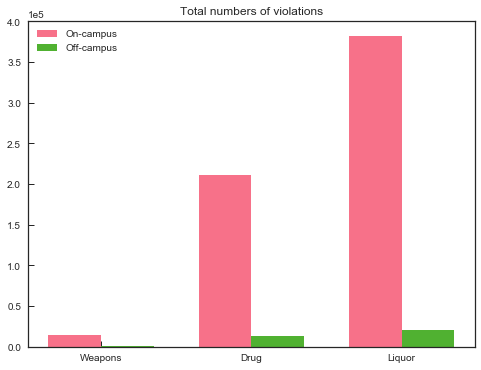

In [4]:
objects = ("Weapons", "Drug", "Liquor")

sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"})
sns.set_palette("husl", 3)

fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(len(objects))
bar_width = 0.35
ax.bar(index, violations_on, bar_width, label="On-campus")
ax.bar(index + bar_width, violations_off, bar_width, label="Off-campus")
ax.legend()
plt.title("Total numbers of violations")
plt.xticks(index + bar_width/2, objects)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig("violations_individual.pdf")
plt.show()

In [5]:
years = [(5, 6, 7), (8, 9), (10, 11, 12), (13, 14, 15)]
violation_off = []
for year, arrest in zip(years, off_list):
    violation = []
    for yr in year:
        temp = list(arrest.loc[:, ['WEAPON{:d}'.format(yr),
                                   'DRUG{:d}'.format(yr),
                                   'LIQUOR{:d}'.format(yr)]].sum(axis=0))
        violation_off.append(temp)

violation_on = []
for year, arrest in zip(years, on_list):
    violation = []
    for yr in year:
        temp = list(arrest.loc[:, ['WEAPON{:d}'.format(yr),
                                   'DRUG{:d}'.format(yr),
                                   'LIQUOR{:d}'.format(yr)]].sum(axis=0))
        violation_on.append(temp)

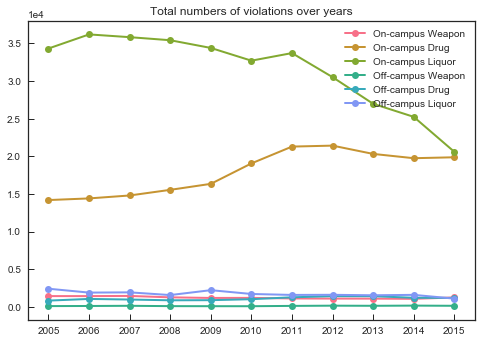

In [6]:
sns.set_palette("husl", 7)
fig, ax = plt.subplots()
index = np.arange(11)
year_names = [str(year) for year in np.arange(2005, 2016)]
for violation, name in zip(zip(*violation_on), ["Weapon", "Drug", "Liquor"]):
    ax.plot(index, violation, lw=2, marker="o", label="On-campus {}".format(name))
for violation, name in zip(zip(*violation_off), ["Weapon", "Drug", "Liquor"]):
    ax.plot(index, violation, lw=2, marker="o", label="Off-campus {}".format(name))
plt.legend()
plt.title("Total numbers of violations over years")
plt.xticks(index, year_names)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig("violations_years.pdf")
plt.show()